## The irreducible mass of black holes.


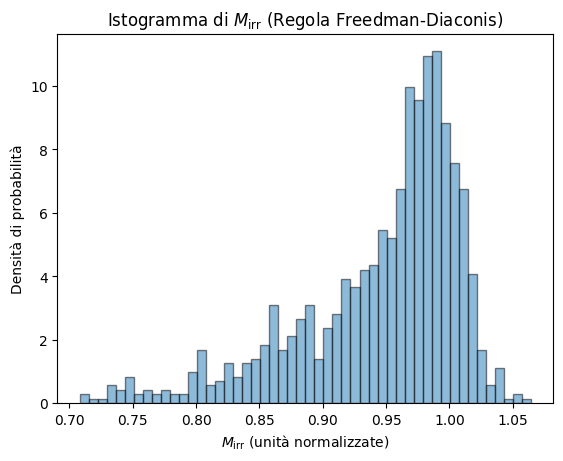

In [ ]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
mu = 1
sigma= 0.02
N = 1000
mass= np.random.normal(mu, sigma, size=N)
chi = np.random.uniform(0,1, size=N)
f_chi = np.sqrt((1 + np.sqrt(1 - chi**2)) / 2)
M_irr = mass * f_chi

bin_width = 3.5*sigma / np.cbrt(N)  #cbrt calcola la radice cubica per ogni elemento dell'array
num_bins = int((M_irr.max() - M_irr.min()) / bin_width)

# Plot dell'istogramma normalizzato (pdf)
plt.hist(M_irr, bins=num_bins, density=True, alpha=0.5, edgecolor="black")
plt.xlabel(r"$M_{\rm irr}$ (unità normalizzate)")
plt.ylabel("Densità di probabilità")
plt.title("Istogramma di $M_{\\rm irr}$ (Regola Freedman-Diaconis)")
plt.show()


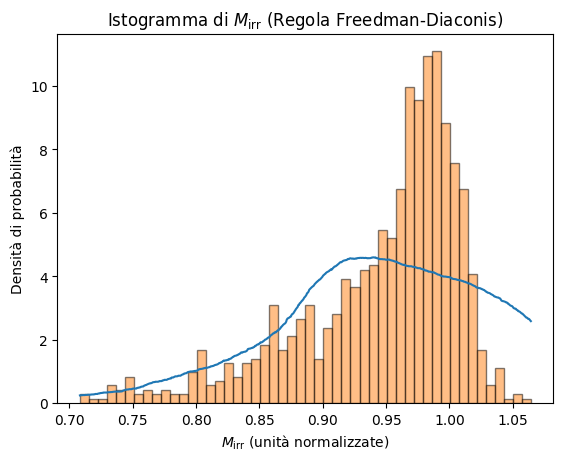

In [ ]:
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(M_irr.min(),M_irr.max(),1000)

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)
PDFtophat = kde_sklearn(M_irr,bandwidth=0.1,kernel="tophat") 
plt.plot(xgrid,PDFtophat)
plt.hist(M_irr, bins=num_bins, density=True, alpha=0.5, edgecolor="black")
plt.xlabel(r"$M_{\rm irr}$ (unità normalizzate)")
plt.ylabel("Densità di probabilità")
plt.title("Istogramma di $M_{\\rm irr}$ + KDE")
plt.show()